# Ex2 - Raz Bareli

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



### 1.a)
As we've seen in class, we can try and fit a simple model to the data that we do have, and then predict the null values.
In order to choose a model, we can split the data to train and test (the data without the null values). Then we can train, say, 3 different models on the train set, and see which one performed best on the test set.
For this question I will choose the Random Forest Classifier / Regressor, accordingly, since they are very good models, and at the same time simple enough.

In [3]:
df = pd.read_csv("ex2.csv")
df.isna().sum()

Unnamed: 0                      0
incident_id                     0
date                            0
state                           0
city_or_county                  0
address                      2044
n_killed                        0
n_injured                       0
congressional_district       1494
gun_stolen                  12430
gun_type                    12423
incident_characteristics       42
latitude                     1018
location_description        24799
longitude                    1018
n_guns_involved             12423
notes                       10211
participant_age             11658
participant_age_group        5419
participant_gender           4659
participant_name            15327
participant_relationship    28033
participant_status           3530
participant_type             3160
state_house_district         4826
state_senate_district        3997
dtype: int64

For the categorical feature, I'll choose participant_gender. For the prediction, I'll use the state' n_killed and n_injured features, since they sound the most relevant. For example, I don't think there is a connection between gender and date, so adding this feature to the prediction can harm it.

Before that, we'll process the gender to 3 categories:
Male, Female, Both:

In [12]:
gender_no_null = df[~df['participant_gender'].isnull()]

gender_no_null.loc[gender_no_null['participant_gender'].str.contains('Female', regex=True) &                         gender_no_null['participant_gender'].str.contains('Male', regex=True), ['participant_gender']] = "Both"
gender_no_null.loc[gender_no_null['participant_gender'].str.contains('Female', regex=True), ['participant_gender']] = "Female"
gender_no_null.loc[gender_no_null['participant_gender'].str.contains('Male', regex=True), ['participant_gender']] = "Male"


gender_no_null['participant_gender'].values

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['Male', 'Both', 'Male', ..., 'Male', 'Male', 'Male'], dtype=object)

Now will choose the features to be part of the model, and prepare them to the training.

In [13]:
gender_null = df[df['participant_gender'].isnull()]
gender_null = gender_null[['state', 'n_killed', 'n_injured', 'participant_gender']]
gender_null = pd.get_dummies(gender_null, columns=['state'])

gender_no_null = gender_no_null[['state', 'n_killed', 'n_injured', 'participant_gender']]
gender_no_null = pd.get_dummies(gender_no_null, columns=['state'])

X = gender_no_null.drop(columns=['participant_gender'])
y = gender_no_null['participant_gender']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
rfc = RandomForestClassifier(100,max_depth=20)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8218342699988043

And now for the prediction:

In [16]:
gender_null['participant_gender'] = rfc.predict(gender_null.drop(columns=["participant_gender"]))
gender_null['participant_gender']

0        Male
2        Male
5        Male
7        Male
18       Male
         ... 
29970    Male
29975    Male
29984    Male
29987    Male
29997    Male
Name: participant_gender, Length: 4659, dtype: object

For the continuous variable we'll choose longitude, and we'll use the regression random forest
This time we will use different set of features for the prediction: state and city_or_county.
It's very likely to predict longitude based on the city, at least with minor errors.

In [17]:
df = pd.read_csv("ex2.csv")

df_longitude = df[['state', 'city_or_county', 'longitude']]
df_longitude = pd.get_dummies(df_longitude, columns=['state', 'city_or_county'])

null_longitude = df_longitude[df_longitude['longitude'].isnull()]
no_null_longitude = df_longitude[~df_longitude['longitude'].isnull()]

In [18]:
X = no_null_longitude.drop(columns=['longitude'])
y = no_null_longitude['longitude']
X

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,...,city_or_county_Yukon,city_or_county_Yulee,city_or_county_Yuma,city_or_county_Zanesville,city_or_county_Zebulon,city_or_county_Zephyrhills,city_or_county_Zillah,city_or_county_Zion,city_or_county_Zionsville,city_or_county_Zwolle
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
rfr = RandomForestRegressor(100, max_depth=20)
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.9070246312161556

And now for the prediction:

In [21]:
null_longitude['longitude'] = rfr.predict(null_longitude.drop(columns=["longitude"]))
null_longitude['longitude']

<ipython-input-21-d541fce9108f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_longitude['longitude'] = rfr.predict(null_longitude.drop(columns=["longitude"]))


18       -85.600568
192      -85.549192
204      -84.762045
213      -85.600568
222     -119.140201
            ...    
29838    -85.600568
29883    -85.600568
29949    -74.336093
29954    -95.396123
29962    -77.103837
Name: longitude, Length: 1018, dtype: float64

### 1.b)
I've decided to work on the "gun_type" feature.
I'm aware that sometimes the data refers to more than one gun, but I will focus on the first value that's in the cell.

In [4]:
df = pd.read_csv("ex2.csv")
df['incident_characteristics'].value_counts()
df['Gun']=df.gun_type.str.extract('([A-Za-z]+|[0-9][mm]+)')
df['Gun'].value_counts()

Unknown    12253
Handgun     2047
9mm          692
Auto         605
Shotgun      336
Rifle        328
LR           320
SW           286
Spl          200
gauge        112
Rem          112
Mag          105
Other         82
AK            72
Win           17
0mm            6
Spr            4
Name: Gun, dtype: int64

I'll define 2 sets of guns: Rifles (=big guns), and Handguns (=small guns).
I'll say that the specific type of the gun is not relevant (at least for the sake of this question).
I'll also keep the 'Unknown' type and combine in with 'Other'

In [5]:
def combine_guns(x):
    if x in ["Handgun","9mm","0mm", "Win","Spl", "Spr"]:
        return 'Handgun'
    if x in ["Other", "Unknown"]:
        return 'Unknown'
    else:
        return 'Rifle'
df["Gun"] = df["Gun"].apply(lambda x:combine_guns(x))
df['Gun']

0        Unknown
1        Handgun
2        Unknown
3          Rifle
4          Rifle
          ...   
29995      Rifle
29996    Handgun
29997      Rifle
29998    Unknown
29999    Unknown
Name: Gun, Length: 30000, dtype: object

### 2.a)
I would add some information on the population in the city where the crime took place. That way, if we know for example that this
city has a lot of poor people or a lot of gun-stores, maybe we can conclude that crimes would be more violent there that in other places
where there are many good schools and higher social-economical class.

### 2.b)
I chose to add the median income of each state. I did it by taking all median incomes of all counties in the state, and take the average over it.
In reality, maybe adding the data of each county is better, but in our data we have the feature 'city_or_county', so it was vry hard to map it to this data which contains only counties, so I chose going with states.

In [52]:
df = pd.read_csv("county_facts.csv")
df = df[['state_abbreviation', 'INC110213']]
yearly_income = df.groupby(['state_abbreviation']).mean().astype(int)
yearly_income.reset_index()

,state_abbreviation,INC110213
0,AK,62611
1,AL,37778
2,AR,35861
3,AZ,42891
4,CA,55558
5,CO,50853
6,CT,70502
7,DC,65830
8,DE,57465
9,FL,43715


Now we'll make a dictionary mapping the state to the average yearly income:

In [53]:
state_to_income = {}
for index, row in yearly_income.reset_index().iterrows():
    state_to_income[row[0]] = row[1]
state_to_income

{'AK': 62611,
 'AL': 37778,
 'AR': 35861,
 'AZ': 42891,
 'CA': 55558,
 'CO': 50853,
 'CT': 70502,
 'DC': 65830,
 'DE': 57465,
 'FL': 43715,
 'GA': 40365,
 'HI': 61790,
 'IA': 49242,
 'ID': 42883,
 'IL': 49112,
 'IN': 47863,
 'KS': 46166,
 'KY': 38526,
 'LA': 42016,
 'MA': 64871,
 'MD': 69403,
 'ME': 45581,
 'MI': 43618,
 'MN': 52327,
 'MO': 41126,
 'MS': 34599,
 'MT': 43596,
 'NC': 41523,
 'ND': 51645,
 'NE': 46594,
 'NH': 58739,
 'NJ': 72386,
 'NM': 40431,
 'NV': 52270,
 'NY': 54496,
 'OH': 47136,
 'OK': 42642,
 'OR': 45103,
 'PA': 49212,
 'RI': 65333,
 'SC': 39188,
 'SD': 45649,
 'TN': 39357,
 'TX': 45651,
 'UT': 53591,
 'VA': 52468,
 'VT': 51800,
 'WA': 49359,
 'WI': 49474,
 'WV': 38216,
 'WY': 55930}

Now we'll add the new data to ex2.csv. I'll use a dictionary to map the state abbreviation to the full name of the state (taken from: "https://gist.github.com/rogerallen/1583593")

In [54]:
df = pd.read_csv("ex2.csv")
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}



In [55]:
def map_state_to_income(x):
    return state_to_income[us_state_to_abbrev[x]]

In [56]:
df['state_median_yearly_income'] = df['state']
df['state_median_yearly_income'] = df['state_median_yearly_income'].apply(map_state_to_income)
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,state_median_yearly_income
0,194704,877945,2017-06-25,California,Humboldt County (county),NaN,0,0,2.0,0::Unknown,...,NaN,0::Adult 18+,NaN,0::Manuel Robert Alvidrez,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,2.0,2.0,55558
1,103375,467550,2015-12-15,Georgia,Gwinnett (county),NaN,0,0,7.0,0::Unknown,...,NaN,NaN,0::Male||1::Male,0::Eric Cotto||1::Christopher Anderson,NaN,0::Unharmed,0::Victim||1::Subject-Suspect,102.0,45.0,40365
2,216952,983151,2017-11-04,North Carolina,Rocky Mount,1000 Block of Niblick Dr,0,0,2.0,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,41523
3,140445,626752,2016-08-11,Texas,Odessa,3939 Tanglewood Lane,0,0,11.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,0::23||1::24,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Male||3::Male||4::Male|...,NaN,2::Home Invasion - Perp Does Not Know Victim||...,0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...,0::Victim||1::Victim||2::Subject-Suspect||3::S...,81.0,31.0,45651
4,72670,349392,2015-05-30,New York,Amityville,"15, 21 Rosewood Avenue",1,2,2.0,NaN,...,0::44||1::38||2::37||3::38,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Louis Wilson||1::Shaun Wilson||2::Junious W...,NaN,0::Killed||1::Injured||2::Injured||3::Unharmed...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,11.0,8.0,54496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,75127,359015,2015-06-14,Georgia,Grovetown,5220 Wrightsboro Road,0,0,12.0,0::Stolen,...,0::38,0::Adult 18+,0::Male,0::Kenneth Temple,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,121.0,23.0,40365
29996,45912,576123,2014-11-11,New York,Yonkers,NaN,0,0,16.0,0::Unknown,...,0::20,0::Adult 18+,0::Male,0::Kevin Wiltshire,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,90.0,35.0,54496
29997,44397,214500,2014-10-31,Washington,Roy,216 McNaught St S,0,0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,49359
29998,238964,1079004,2018-03-26,Virginia,Newport News,4500 block of Baughman Ct,0,1,3.0,0::Unknown,...,0::21,0::Adult 18+,0::Male||1::Male,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,95.0,2.0,52468


### 3.a)
First I will aggregate the month and the number of injured within each state, to see if there are months with more violent crimes in general.
I'll first extract the month from the date feature and then aggregate as we learned in class:

In [57]:
def extract_month(x):
    return int(x[5:-3])
df['month'] = df['date'].apply(extract_month)
df['month']

0         6
1        12
2        11
3         8
4         5
         ..
29995     6
29996    11
29997    10
29998     3
29999     2
Name: month, Length: 30000, dtype: int64

In [58]:
counter = df.groupby(["state","month"]).count().reset_index()[["state","month","n_injured"]].rename(columns={"n_injured":"n_injured_in_month"})
df = df.merge(counter,on = ["state","month"])
df.groupby(["state","month"]).agg({"n_injured_in_month":["mean"]})

n_injured_in_month
                            mean
state   month                   
Alabama 1                   86.0
        2                   55.0
        3                   79.0
        4                   51.0
        5                   47.0
...                          ...
Wyoming 8                    4.0
        9                    4.0
        10                   3.0
        11                   4.0
        12                   7.0

[610 rows x 1 columns]

The second aggregation I'll do will be a combination of the median income (a feature I've added before), and the number of killed people in the accident. I'll show the mean number of killed people for every crime that happened in a state with 'x' income

In [59]:
counter = df.groupby(["state_median_yearly_income"]).count().reset_index()[["state_median_yearly_income","n_killed"]].rename(
    columns={"n_killed": "n_killed_per_income"})
df = df.merge(counter,on = ["state_median_yearly_income"])
df.groupby(["state_median_yearly_income"]).agg({"n_killed_per_income": ["mean"]})

,n_killed_per_income
,mean
state_median_yearly_income,
34599,476.0
35861,326.0
37778,676.0
38216,192.0
38526,523.0
39188,856.0
39357,984.0
40365,1144.0


Just out of curiosity, let's plot the results of the above and see if there are more killed people in poorer areas, per crime:

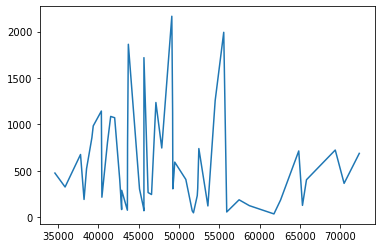

In [60]:
p = df.groupby(["state_median_yearly_income"]).agg({"n_killed_per_income": ["mean"]})
p = p.reset_index()
plt.plot(p['state_median_yearly_income'], p['n_killed_per_income'])

### 3.b)

<AxesSubplot:>

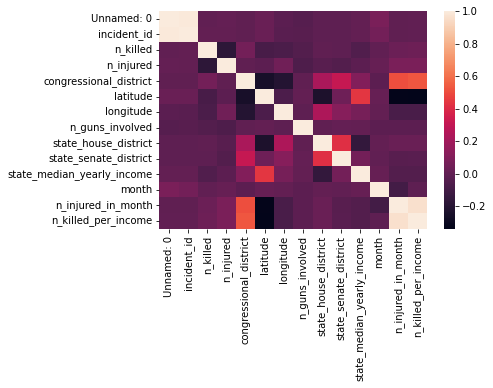

In [61]:
sns.heatmap(pd.DataFrame(df).corr())

While there are some correlation between features, most of them are location dependent - so they are correlated by default and that's not interesting. I've tried to look for a correlation between location and number of kills / injuries, but still I don't think that I can find any significant correlation. Keep in mind that this is the Pearson correlation, maybe we have some features that are correlated in different ways.

### 4.a)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv("covid_data.csv")
X = np.array(df['day_num']).reshape(-1, 1)
y = np.array(df['detected']).reshape(-1, 1)

In [46]:
lin = LinearRegression()
lin.fit(X, y)
pred = lin.predict(X)
print("mse = ", round(mean_squared_error(y, pred)))

mse =  1669656


### 4.b)

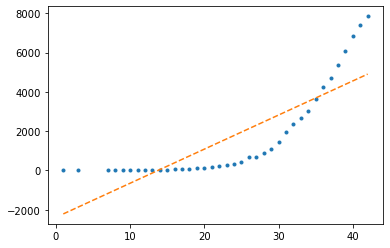

In [47]:
plt.plot(df['day_num'], df['detected'], '.')
plt.plot(df['day_num'], pred, '--')

I've plotted the predicted fitted model and the actual data.
Looks like we have exponential increase in detected cases as the days go by, and not linear. that explains the large mse from previous question. On the long run - our linear model will predict even worse.

### 4.c)
An exponential function will look like this:

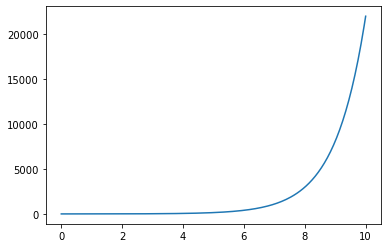

In [39]:
x1 = np.linspace(0, 10, 200)
x2 = np.e ** x1
plt.plot(x1,x2)

And that seems pretty good fit for uor data. So we'll try and fit an exponential function to fit our data:

mse =  56460


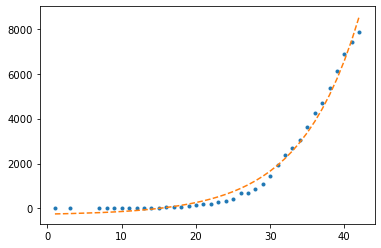

In [42]:
import scipy.optimize

def exp(x, m, t, b):
    return m * np.exp(t * x) + b

X = df.day_num
y = df.detected

# fit
params, cv = scipy.optimize.curve_fit(exp, X, y)
m, t, b = params

# predict
pred = np.array([exp(x, m, t, b) for x in X])

# mse
print("mse = ", round(mean_squared_error(y, pred)))

# plot
plt.plot(X, y, '.')
plt.plot(X, exp(X, m, t, b), '--')


That's looks much better, of course, and we can see that the mse have decreased dramatically as well.